In [1]:
                                                                                                                                                                                                                                                                            import seaborn as sns
                                                                                                                                                                                                                                                                            import matplotlib.pyplot as plt
                                                                                                                                                                                                                                                                            import pandas as pd 

In [2]:
Report = []
for ds_name in ['CiteSeer', 'Cora']:#, 'PubMed', 'WikiCS']:
    for mc in [x / 10.0 for x in range(1, 11)]:
        %run src/main.py --dataset-name {ds_name} --clustering-overlap True\
        --clustering-method 'danmf' --epochs 10\
        --membership-closeness {mc}
        Report.append(ds_report)
        
df = pd.DataFrame(Report, columns=['Winner Membership Closeness','Dataset Name',\
'F-1 Score', 'Overlapped Nodes','Run Time'])
df

Train Loss: 0.4261: 100%|██████████| 10/10 [00:01<00:00,  9.30it/s]


,Winner Membership Closeness,Dataset Name,F-1 Score,Overlapped Nodes,Run Time
0,0.1,CiteSeer,0.714240,0.329426,33.716805
1,0.2,CiteSeer,0.718153,0.232943,8.856720
2,0.3,CiteSeer,0.693338,0.182146,19.423826
3,0.4,CiteSeer,0.714885,0.120830,24.332541
4,0.5,CiteSeer,0.681729,0.088969,9.293727
5,0.6,CiteSeer,0.679435,0.061918,10.213900
6,0.7,CiteSeer,0.696042,0.048993,12.462969
7,0.8,CiteSeer,0.692436,0.030057,10.292103
8,0.9,CiteSeer,0.697811,0.016531,10.600356
9,1.0,CiteSeer,0.678220,0.000000,11.140316


In [3]:
score_file_name = 'results/F1_score.xlsx'
writer = ExcelWriter(score_file_name)
df.to_excel(writer)#, sheet_name='All')  # , index=False)
writer.save()        
writer.close()

/home/mahmood/anaconda3/lib/python3.7/site-packages/xlsxwriter/workbook.py:329: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


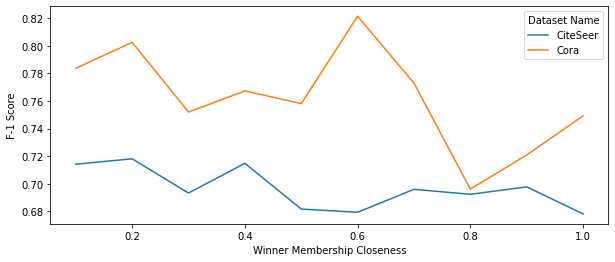

In [4]:
score_file_name = 'results/F1_score.xlsx'
df = pd.read_excel(score_file_name, engine="openpyxl") 
fig = plt.figure(figsize=(10, 4))
sns.lineplot(x="Winner Membership Closeness", y="F-1 Score",
             hue="Dataset Name",# style="min_freq",
             data=df)
# png_file_name = 'results/{}.png'.format(args.dataset_name)
score_png_file_name = 'results/F1_score.png'
fig.savefig(score_png_file_name)

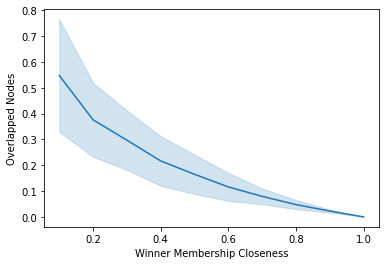

In [5]:
sns.lineplot(x="Winner Membership Closeness", y="Overlapped Nodes",
#              hue="dataset name",# style="min_freq",
             data=df)
ON_png_file_name = 'results/ON.png'
fig.savefig(ON_png_file_name)

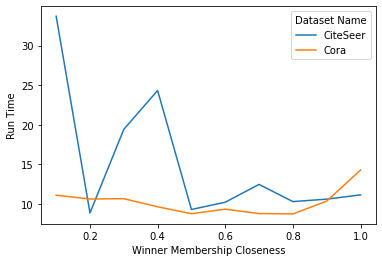

In [6]:
sns.lineplot(x="Winner Membership Closeness", y="Run Time",
             hue="Dataset Name",# style="min_freq",
             data=df)
RT_png_file_name = 'results/RT.png'
fig.savefig(RT_png_file_name)

In [7]:
# from google.colab import files
# files.download(score_file_name) 
# files.download(score_png_file_name) 
# files.download(ON_ong_file_name) 
# files.download(RT_ong_file_name) 